# Streaming Patchwork Builder

This notebook presents features of `StreamingPatchworkBuilder` which is a class designed for stitching multiple stripes of images and return part of resulting image as soon as it is fixed. It is opposite to `PatchworkBuilder` which returns complete patchwork on calling `get` method.

## Demo data
Demo data is defived from image below, by cutting, blurring and mapping pixel values.

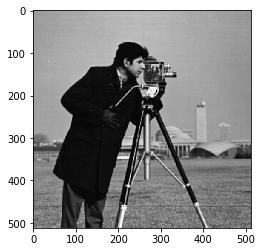

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data

plt.imshow(data.camera(), cmap='gray')
plt.show()

Stripes derived from this image look as follows. Each row of images single stripe. Images in one row represent different z-axis. They differ slightly by blur. Images in rows are shifted horizontally to simulate real conditions.

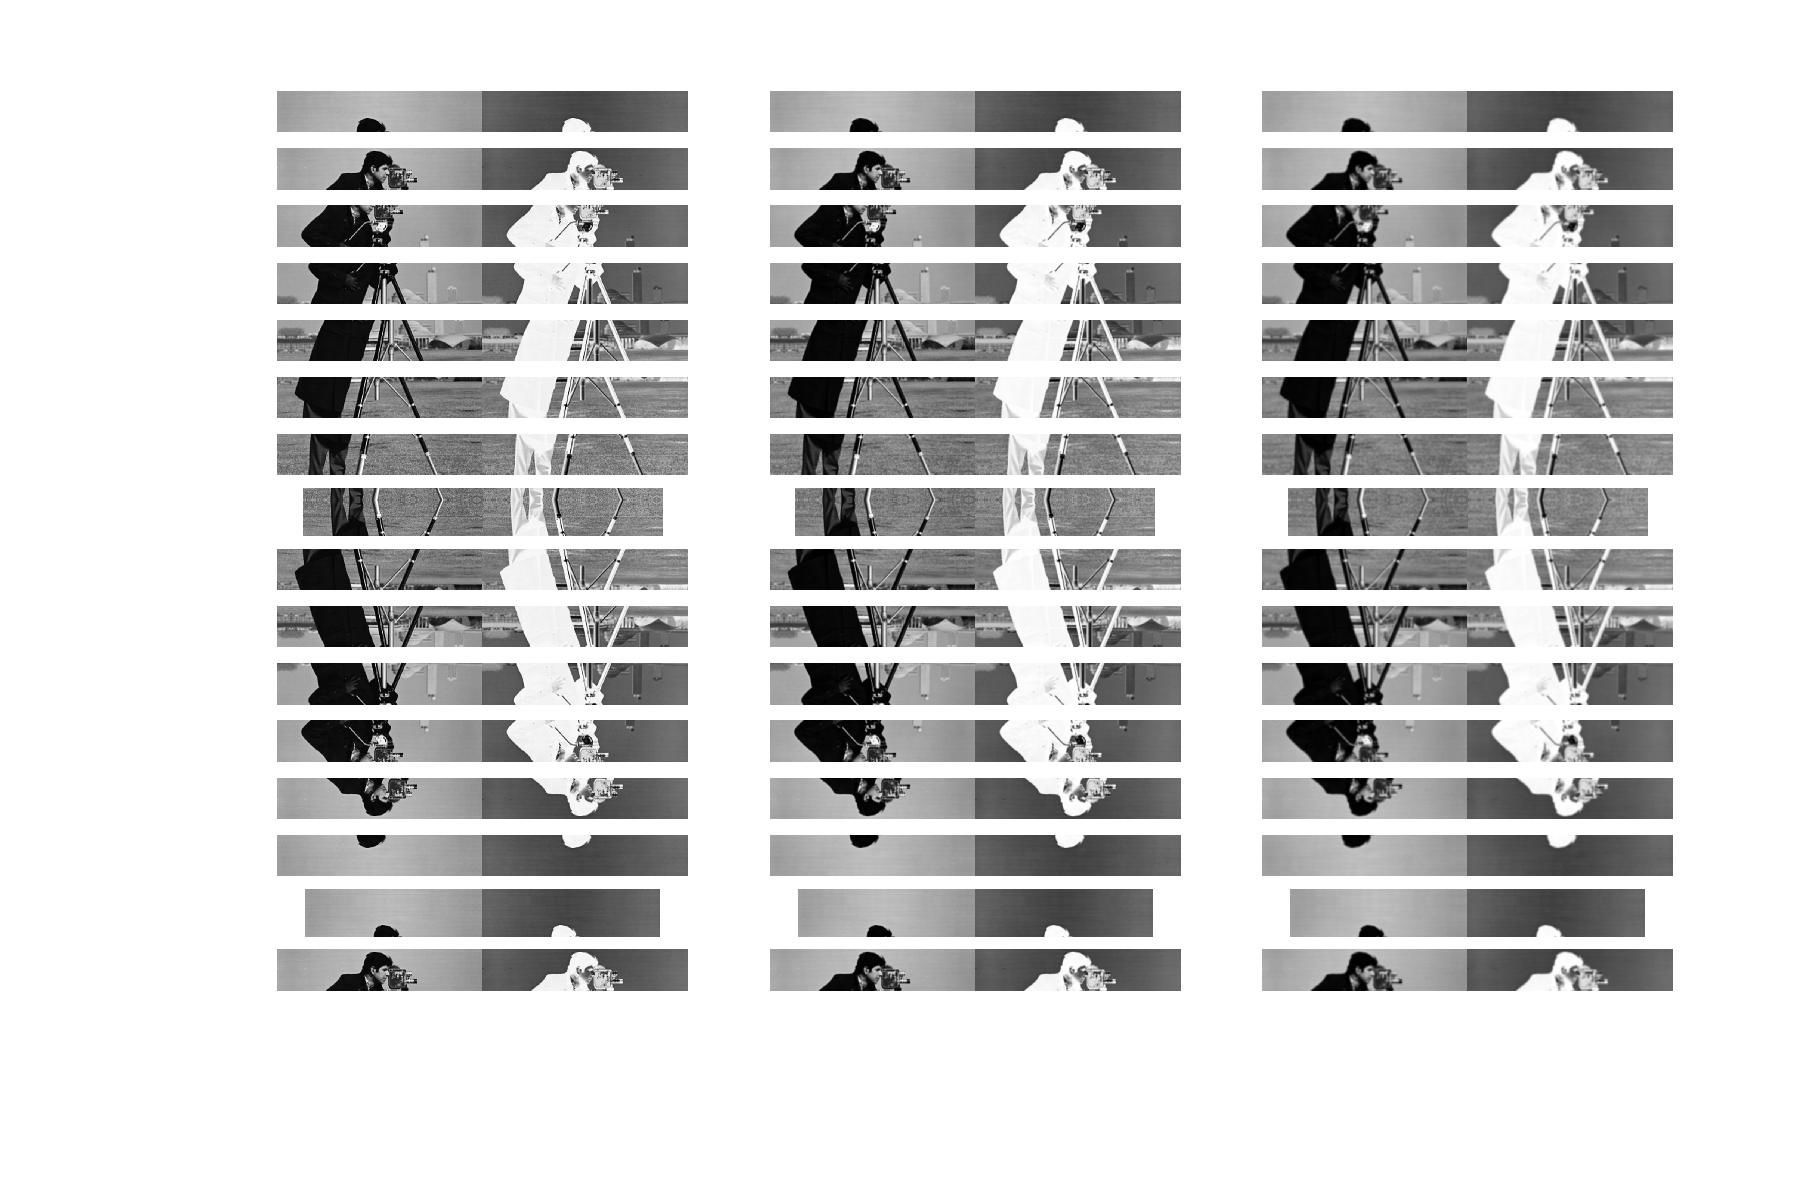

In [2]:
from alpenglow.image_sources.demo import DemoImageSource

stripe_count = 16
version_count = 3
image_source = DemoImageSource(stripe_count=7, version_count=version_count, channel_count=2,
                               vertical_shifts=(19, 38, 0), overlap=0.4)

fig = plt.figure(figsize=(3, 2), dpi=600)
    
for version_id in range(version_count):
    for stripe_id in range(stripe_count):
        ax = fig.add_subplot(stripe_count, version_count, 1 + version_id + version_count * stripe_id)
        ax.imshow(image_source.get_image(stripe_id, version_id), cmap='gray')
        ax.set_axis_off()
plt.show()

Code below shows parts of the resulting image returned after feeding the `StreamingPatchworkBuilder` with consecutive rows of data.

After stripe 0 0 rows were ready
relative shift: [ 46 -19] stripe height: (111, 550)
After stripe 1 111 rows were ready


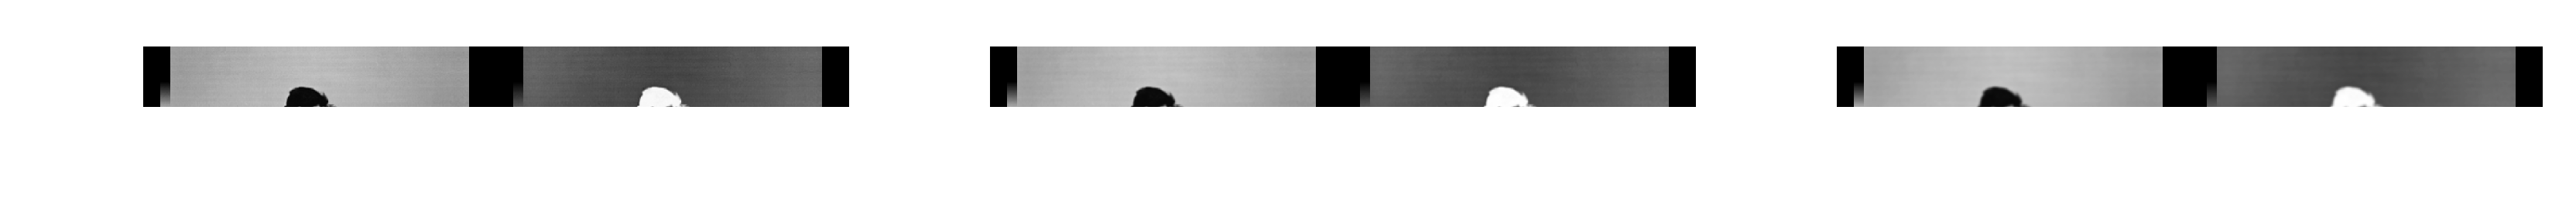

relative shift: [44 38] stripe height: (111, 550)
After stripe 2 65 rows were ready


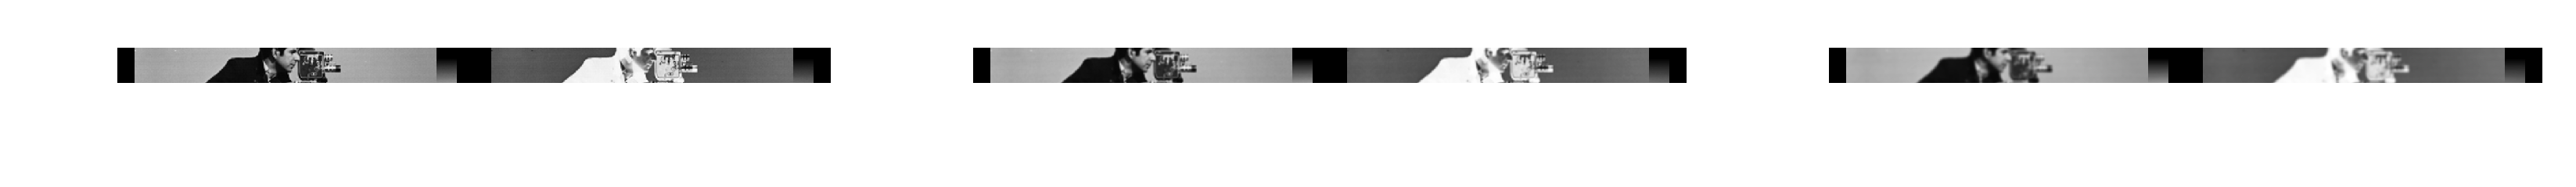

relative shift: [ 45 -19] stripe height: (111, 550)
After stripe 3 67 rows were ready


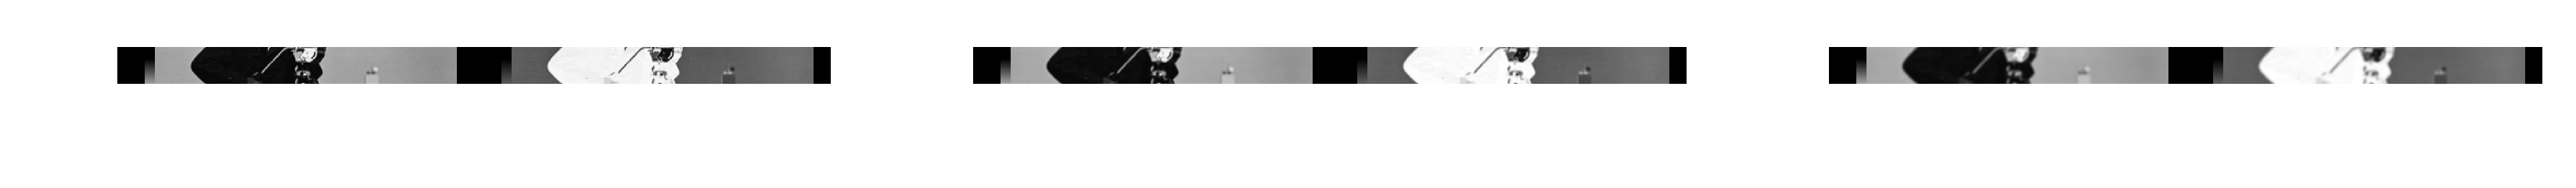

relative shift: [ 47 -19] stripe height: (111, 550)
After stripe 4 66 rows were ready


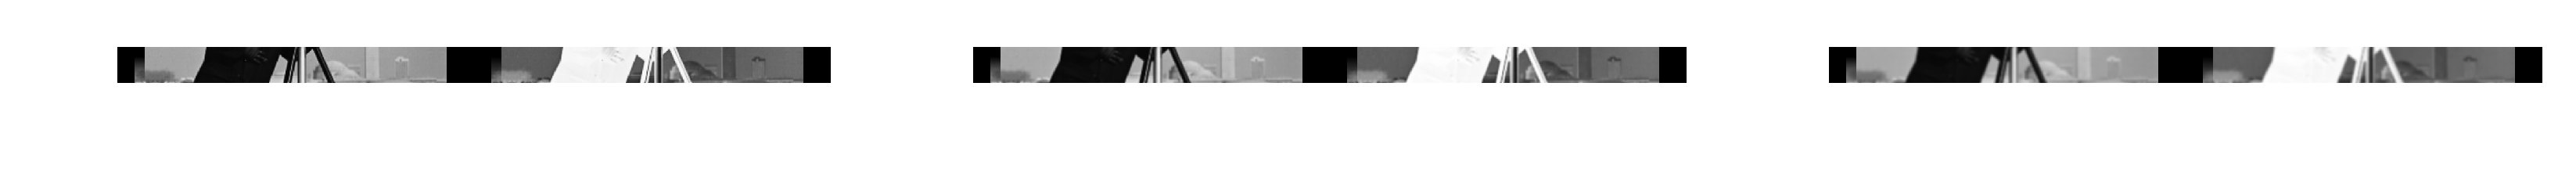

relative shift: [45 38] stripe height: (111, 550)
After stripe 5 64 rows were ready


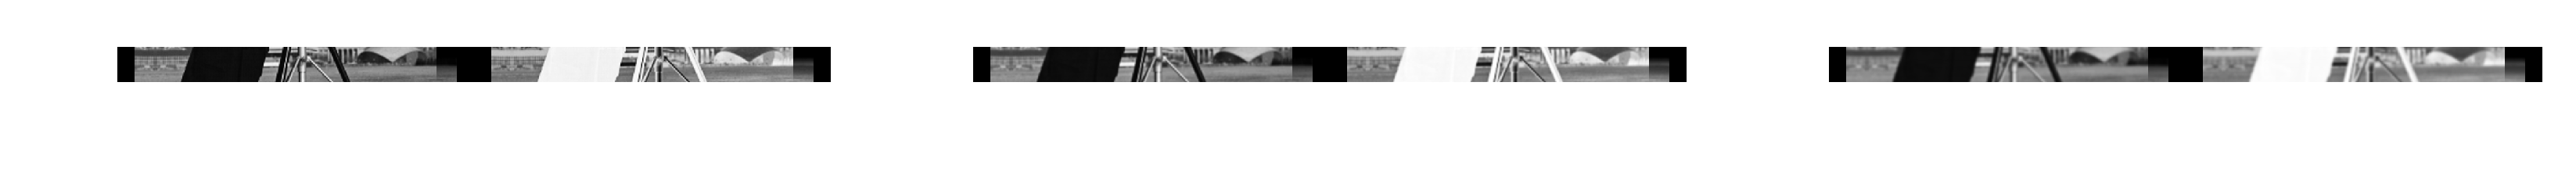

relative shift: [ 44 -19] stripe height: (110, 550)
After stripe 6 66 rows were ready


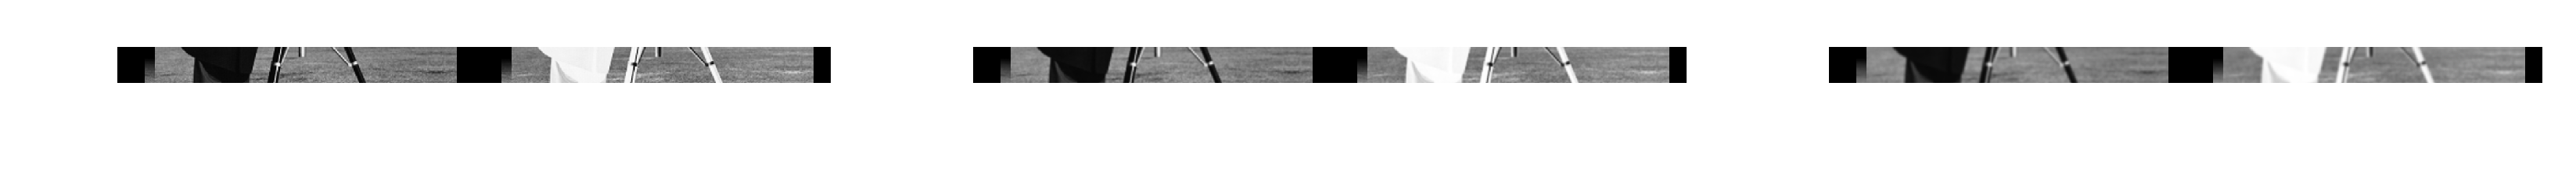

relative shift: [36  0] stripe height: (146, 550)
After stripe 7 66 rows were ready


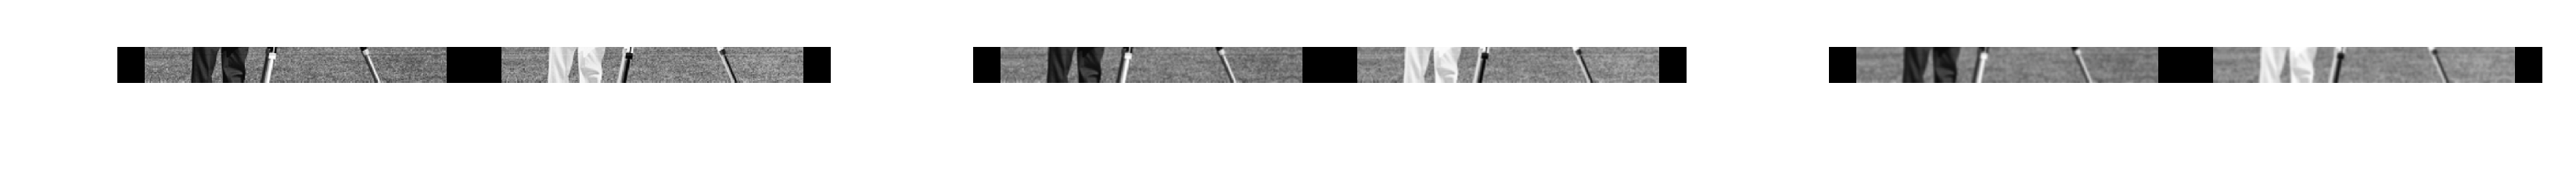

relative shift: [44 19] stripe height: (111, 550)
After stripe 8 110 rows were ready


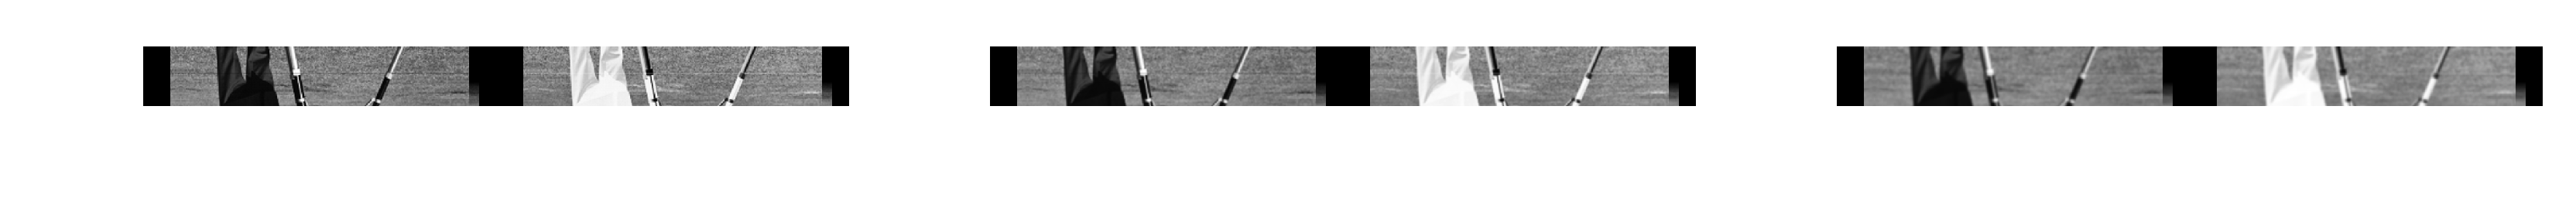

relative shift: [ 45 -38] stripe height: (111, 550)
After stripe 9 67 rows were ready


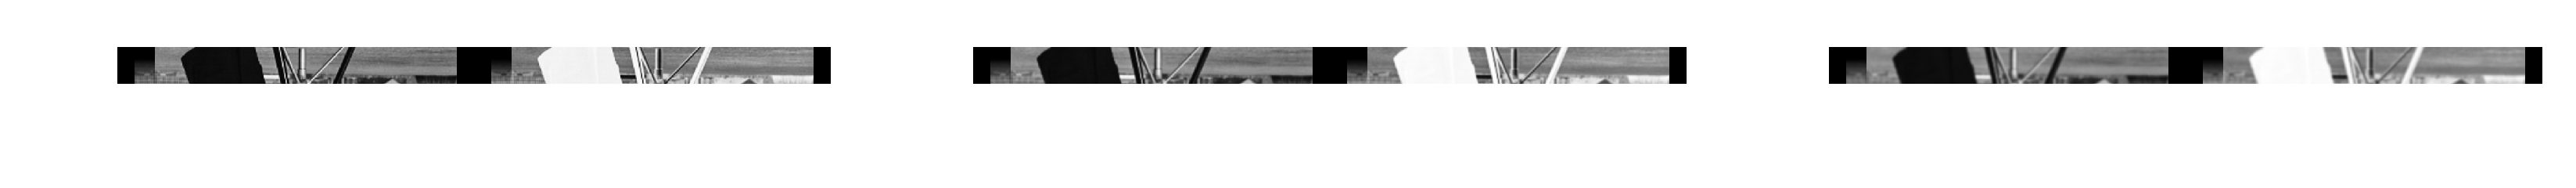

relative shift: [47 19] stripe height: (111, 550)
After stripe 10 66 rows were ready


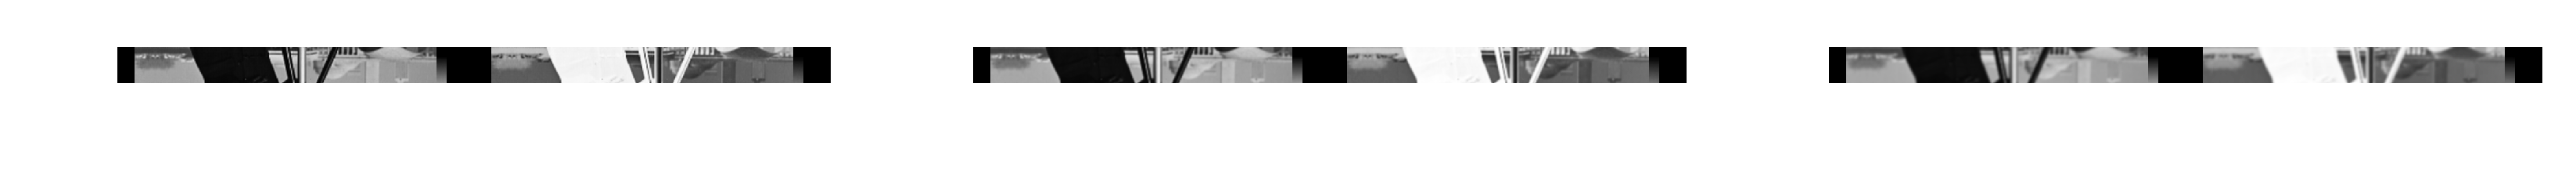

relative shift: [45 19] stripe height: (111, 550)
After stripe 11 64 rows were ready


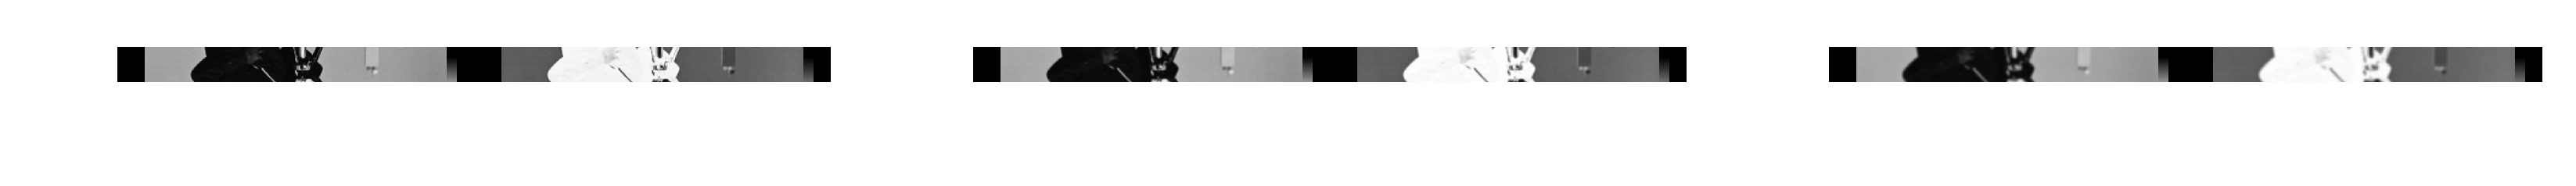

relative shift: [ 44 -38] stripe height: (111, 550)
After stripe 12 66 rows were ready


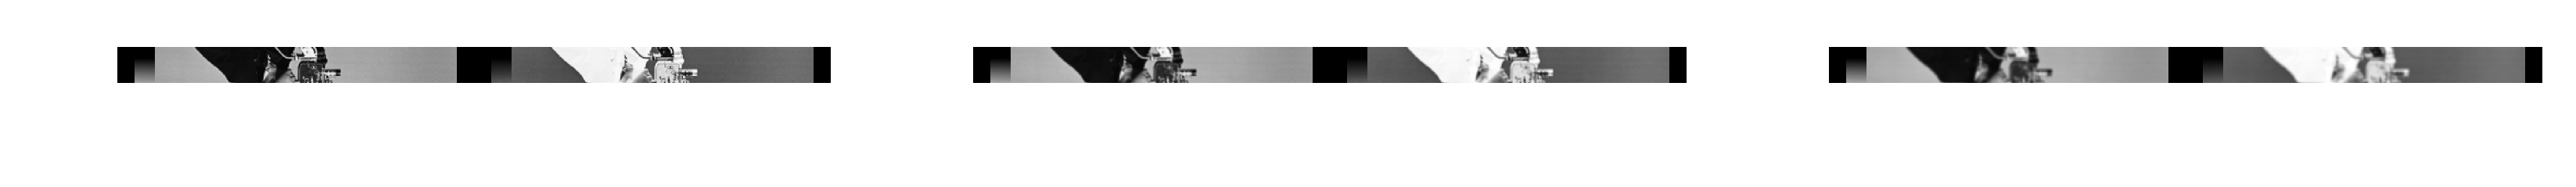

relative shift: [46 19] stripe height: (111, 550)
After stripe 13 67 rows were ready


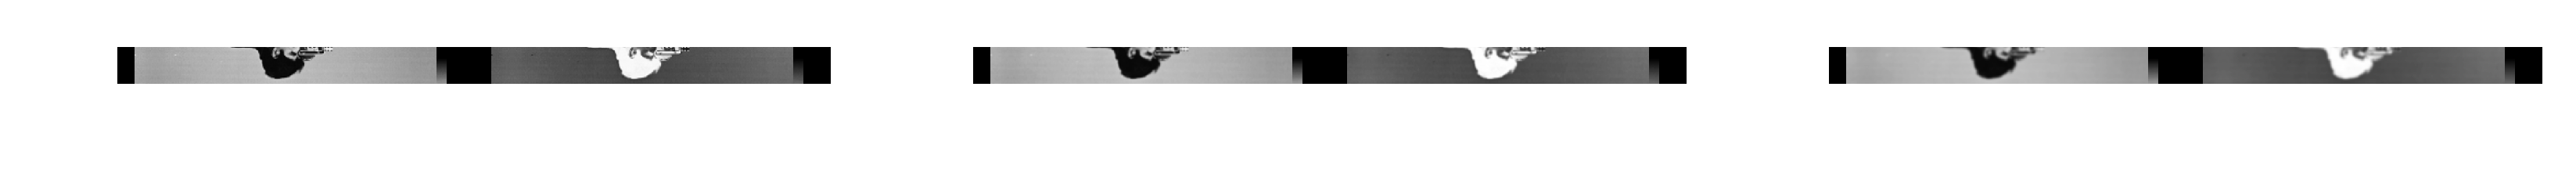

relative shift: [37  0] stripe height: (148, 550)
After stripe 14 65 rows were ready


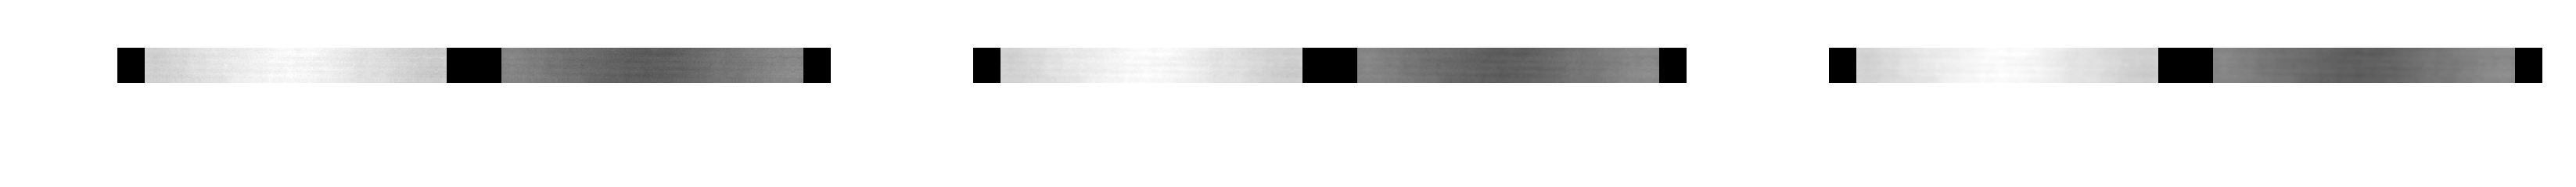

relative shift: [ 46 -19] stripe height: (111, 550)
After stripe 15 111 rows were ready


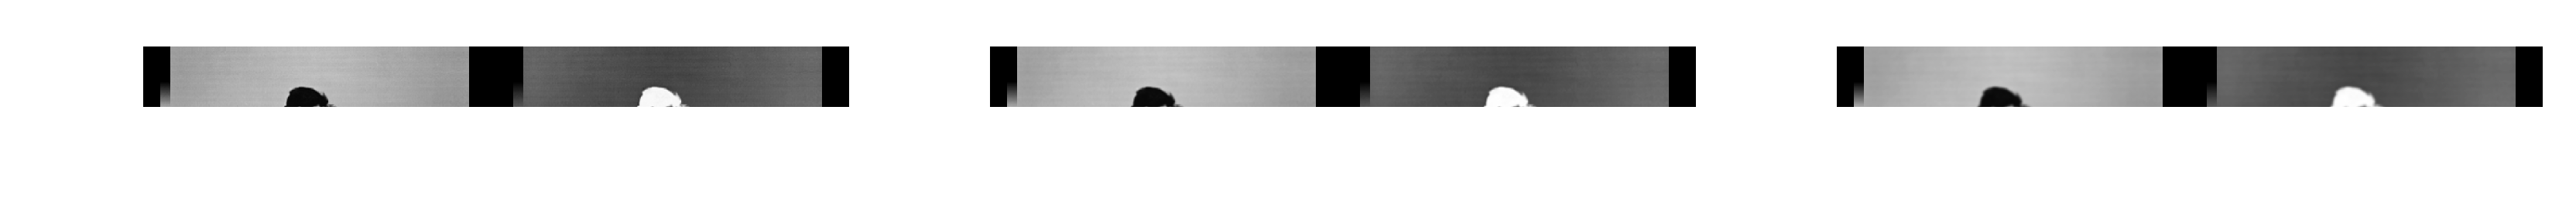

65 rows were available at the end


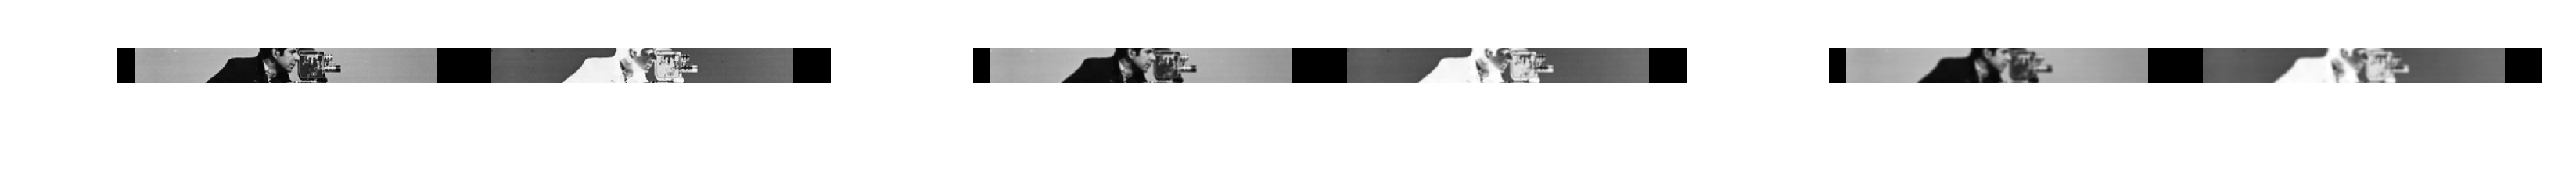

By simply conncating rows from this images we get the full picture (possibly with some black margins)


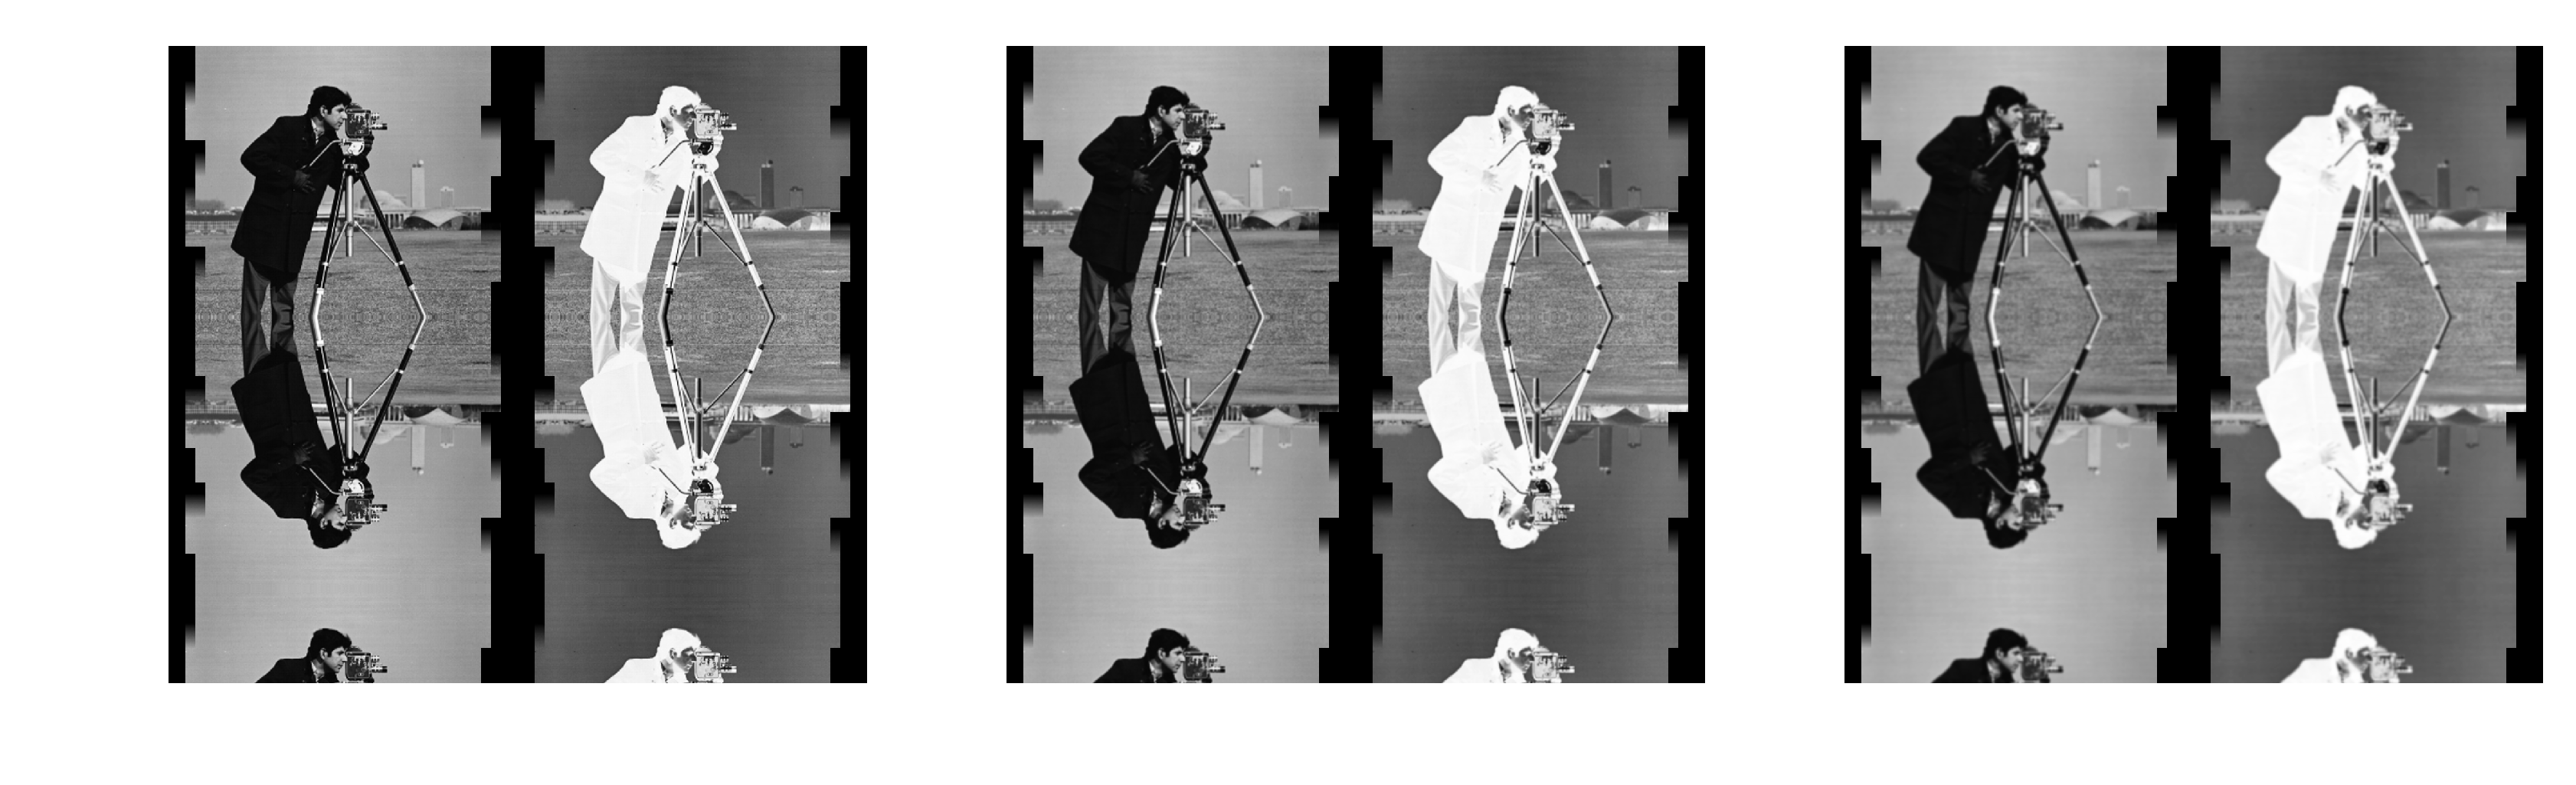

benchmarks
stitching times: [0.1191709041595459, 0.6044249534606934, 0.6026229858398438, 0.6333320140838623, 0.6135540008544922, 0.5910670757293701, 0.5965390205383301, 0.6032459735870361, 0.5914268493652344, 0.6253819465637207, 0.5910048484802246, 0.5897119045257568, 0.608957052230835, 0.5885210037231445, 0.5956120491027832, 0.5874731540679932]
result building times: [0.7293601036071777, 0.35956716537475586, 0.36775898933410645, 0.35578298568725586, 0.3512001037597656, 0.37102508544921875, 0.3468289375305176, 0.36953186988830566, 0.37465882301330566, 0.3535330295562744, 0.34905314445495605, 0.3505840301513672, 0.34773993492126465, 0.3686230182647705, 0.35393404960632324, 0.0004107952117919922]


In [3]:
from alpenglow.matching_algorithms.fft import FftMatchingAlgorithm
matching_algorithm = FftMatchingAlgorithm([0, 2], [0, 1])

from alpenglow.patchwork_builders.streaming import StreamingPatchworkBuilder
builder = StreamingPatchworkBuilder(matching_algorithm, margin=50)

rows = []

for stripe_id in range(stripe_count):
    data = builder.stitch(image_source.get_stripe(stripe_id))
    
    rows_ready = data.get_image(0).shape[0]
    print("After stripe {0} {1} rows were ready".format(stripe_id, rows_ready))
    
    if rows_ready > 0:
        rows.append(data)
        fig = plt.figure(figsize=(10, 1), dpi=400)
    
        for version_id in range(version_count):
            ax = fig.add_subplot(1, version_count, 1 + version_id)
            ax.imshow(data.get_image(version_id), cmap='gray')
            ax.set_axis_off()
        plt.show()
        
data = builder.get()

rows_ready = data.get_image(0).shape[0]
print("{0} rows were available at the end".format(rows_ready))

if rows_ready > 0:
    rows.append(data)
    fig = plt.figure(figsize=(10, 1), dpi=400)

    for version_id in range(version_count):
        ax = fig.add_subplot(1, version_count, 1 + version_id)
        ax.imshow(data.get_image(version_id), cmap='gray')
        ax.set_axis_off()
    plt.show()
    
print("By simply conncating rows from this images we get the full picture (possibly with some black margins)")
fig = plt.figure(figsize=(10, 3), dpi=400)

import numpy
for version_id in range(version_count):
    image = numpy.concatenate([data.get_image(version_id) for data in rows])
    ax = fig.add_subplot(1, version_count, 1 + version_id)
    ax.imshow(image, cmap='gray')
    ax.set_axis_off()
plt.show()
    
stitching_times, result_building_times = builder.benchmark()
print("benchmarks\nstitching times: {0}\nresult building times: {1}".format(stitching_times, result_building_times))

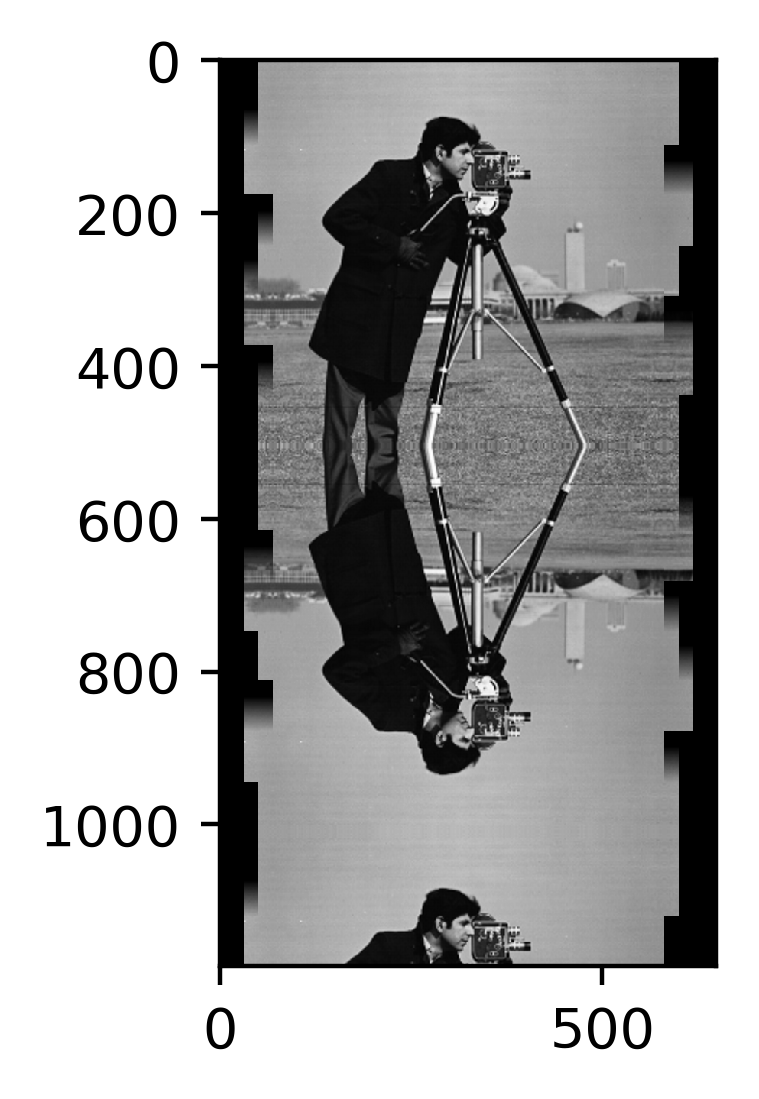

In [4]:
plt.figure(figsize=(3, 3), dpi=400)
plt.imshow(numpy.concatenate([data.get_channel_image(0, 0) for data in rows]), cmap='gray')
plt.show()